In [1]:
import numpy as np
import sys
np.set_printoptions(linewidth=np.inf)
np.set_printoptions(precision=3)
import matplotlib.pyplot as plt
import math



In [2]:
n_x=30
n_y=30

dx=1.0/n_x
dy=1.0/n_y

Re=100

In [3]:
def momentum_link_coefficients(u_star,u_face,v_face,p,source_x,source_y,A_p,A_e,A_w,A_n,A_s):

    D_e=dy/(dx*Re)
    D_w=dy/(dx*Re)

    D_n=dx/(dy*Re)
    D_s=dx/(dy*Re)

    #interior cells
    for i in range(2,n_y):
        for j in range(2,n_x):

            F_e=dy*u_face[i,j]
            F_w=dy*u_face[i,j-1]
            F_n=dx*v_face[i-1,j]
            F_s=dx*v_face[i,j]

            A_e[i,j]=D_e + max(0.0,-F_e)
            A_w[i,j]=D_w + max(0.0,F_w)
            A_n[i,j]=D_n + max(0.0,-F_n)
            A_s[i,j]=D_s + max(0.0,F_s)
            A_p[i,j]=A_w[i,j] + A_e[i,j] + A_n[i,j] + A_s[i,j] + (F_e-F_w) + (F_n-F_s)

            source_x[i,j]=0.5*(p[i,j-1]-p[i,j+1])*dx
            source_y[i,j]=0.5*(p[i+1,j]-p[i-1,j])*dy

    #left wall
    j=1
    for i in range(2,n_y):

        F_e=dy*u_face[i,j]
        F_w=dy*u_face[i,j - 1]   #left face velocity is initialised to zero
        F_n=dx*v_face[i - 1,j]
        F_s=dx*v_face[i,j]

        A_e[i,j]=D_e + max(0.0,-F_e)
        A_w[i,j]=2*D_w + max(0.0,F_w)
        A_n[i,j]=D_n + max(0.0,-F_n)
        A_s[i,j]=D_s + max(0.0,F_s)
        A_p[i,j]=A_w[i,j] + A_e[i,j] + A_n[i,j] + A_s[i,j] + (F_e - F_w) + (F_n - F_s)

        source_x[i,j]=0.5*(p[i,j] - p[i,j + 1])*dx   # P_o - 0.5(P_o+P_e)
        source_y[i,j]=0.5*(p[i + 1,j] - p[i - 1,j])*dy

    #bottom wall
    i=n_y
    for j in range(2,n_x):
        F_e=dy*u_face[i,j]
        F_w=dy*u_face[i,j - 1]
        F_n=dx*v_face[i - 1,j]
        F_s=dx*v_face[i,j]             #bottom wall v-velocity is already initialised to zero

        A_e[i,j]=D_e + max(0.0,-F_e)
        A_w[i,j]=D_w + max(0.0,F_w)
        A_n[i,j]=D_n + max(0.0,-F_n)
        A_s[i,j]=2*D_s + max(0.0,F_s)
        A_p[i,j]=A_w[i,j] + A_e[i,j] + A_n[i,j] + A_s[i,j] + (F_e - F_w) + (F_n - F_s)

        source_x[i,j]=0.5*(p[i,j - 1] - p[i,j + 1])*dx
        source_y[i,j]=0.5*(p[i,j] - p[i - 1,j])*dy     #P_o - 0.5(P_o+P_n)

    #right wall
    j=n_x
    for i in range(2,n_y):
        F_e=dy*u_face[i,j]
        F_w=dy*u_face[i,j - 1]   #right face velocity is initialised to zero
        F_n=dx*v_face[i - 1,j]
        F_s=dx*v_face[i,j]

        A_e[i,j]=D_e + max(0.0,-F_e)
        A_w[i,j]=2*D_w + max(0.0,F_w)
        A_n[i,j]=D_n + max(0.0,-F_n)
        A_s[i,j]=D_s + max(0.0,F_s)
        A_p[i,j]=A_w[i,j] + A_e[i,j] + A_n[i,j] + A_s[i,j] + (F_e - F_w) + (F_n - F_s)

        source_x[i,j]=0.5*(p[i,j-1] - p[i,j ])*dx   #0.5(P_w+P_o)-P_o
        source_y[i,j]=0.5*(p[i + 1,j] - p[i - 1,j])*dy

    #top wall
    i=1
    for j in range(2,n_y):
        F_e=dy*u_face[i,j]
        F_w=dy*u_face[i,j - 1]
        F_n=dx*v_face[i - 1,j]
        F_s=dx*v_face[i,j]

        A_e[i,j]=D_e + max(0.0,-F_e)
        A_w[i,j]=D_w + max(0.0,F_w)
        A_n[i,j]=2*D_n + max(0.0,-F_n)
        A_s[i,j]=D_s + max(0.0,F_s)
        A_p[i,j]=A_w[i,j] + A_e[i,j] + A_n[i,j] + A_s[i,j] + (F_e - F_w) + (F_n - F_s)

        source_x[i,j]=0.5*(p[i,j - 1] - p[i,j + 1])*dx
        source_y[i,j]=0.5*(p[i + 1,j] - p[i,j])*dy   #0.5(P_s+P_o) - P_o

    #top left corner
    i=1
    j=1
    F_e=dy*u_face[i,j]
    F_w=dy*u_face[i,j - 1]
    F_n=dx*v_face[i - 1,j]
    F_s=dx*v_face[i,j]

    A_e[i,j]=D_e + max(0.0,-F_e)
    A_w[i,j]=2*D_w + max(0.0,F_w)
    A_n[i,j]=2*D_n + max(0.0,-F_n)
    A_s[i,j]=D_s + max(0.0,F_s)
    A_p[i,j]=A_w[i,j] + A_e[i,j] + A_n[i,j] + A_s[i,j] + (F_e - F_w) + (F_n - F_s)

    source_x[i,j]=0.5*(p[i,j] - p[i,j + 1])*dx  # P_o - 0.5(P_o+P_e)
    source_y[i,j]=0.5*(p[i + 1,j] - p[i,j])*dy  #0.5(P_s+P_o) - P_o

    #top right corner
    i=1
    j=n_x
    F_e=dy*u_face[i,j]
    F_w=dy*u_face[i,j - 1]  #right face velocity is initialised to zero
    F_n=dx*v_face[i - 1,j]
    F_s=dx*v_face[i,j]

    A_e[i,j]=D_e + max(0.0,-F_e)
    A_w[i,j]=2*D_w + max(0.0,F_w)
    A_n[i,j]=2*D_n + max(0.0,-F_n)
    A_s[i,j]=D_s + max(0.0,F_s)
    A_p[i,j]=A_w[i,j] + A_e[i,j] + A_n[i,j] + A_s[i,j] + (F_e - F_w) + (F_n - F_s)

    source_x[i,j]=0.5*(p[i,j - 1] - p[i,j])*dx  #0.5(P_w+P_o)-P_o
    source_y[i,j]=0.5*(p[i + 1,j] - p[i,j])*dy  #0.5(P_s+P_o) - P_o

    #bottom left corner
    i=n_y
    j=1

    F_e=dy*u_face[i,j]
    F_w=dy*u_face[i,j - 1]  #left face velocity is initialised to zero
    F_n=dx*v_face[i - 1,j]
    F_s=dx*v_face[i,j]

    A_e[i,j]=D_e + max(0.0,-F_e)
    A_w[i,j]=2*D_w + max(0.0,F_w)
    A_n[i,j]=D_n + max(0.0,-F_n)
    A_s[i,j]=2*D_s + max(0.0,F_s)
    A_p[i,j]=A_w[i,j] + A_e[i,j] + A_n[i,j] + A_s[i,j] + (F_e - F_w) + (F_n - F_s)

    source_x[i,j]=0.5*(p[i,j] - p[i,j + 1])*dx  # P_o - 0.5(P_o+P_e)
    source_y[i,j]=0.5*(p[i,j] - p[i - 1,j])*dy  #P_o - 0.5(P_o+P_n)

    #bottom right corner
    i=n_y
    j=n_x
    F_e=dy*u_face[i,j]
    F_w=dy*u_face[i,j - 1]  #right face velocity is initialised to zero
    F_n=dx*v_face[i - 1,j]
    F_s=dx*v_face[i,j]

    A_e[i,j]=2*D_e + max(0.0,-F_e)
    A_w[i,j]=2*D_w + max(0.0,F_w)
    A_n[i,j]=D_n + max(0.0,-F_n)
    A_s[i,j]=D_s + max(0.0,F_s)
    A_p[i,j]=A_w[i,j] + A_e[i,j] + A_n[i,j] + A_s[i,j] + (F_e - F_w) + (F_n - F_s)

    source_x[i,j]=0.5*(p[i,j - 1] - p[i,j])*dx  #0.5(P_w+P_o)-P_o
    source_y[i,j]=0.5*(p[i,j] - p[i - 1,j])*dy  #P_o - 0.5(P_o+P_n)


    return A_p,A_e,A_w,A_n,A_s,source_x,source_y

In [4]:
def solve(u,u_star,A_p,A_e,A_w,A_n,A_s,source_x,alpha,epsilon,max_inner_iteration,l2_norm):

    for n in range(1,max_inner_iteration+1):

        l2_norm=0
        for i in range(1,n_y+1):
            for j in range(1,n_x+1):
                u[i,j]= alpha*(A_e[i,j]*u[i,j+1] + A_w[i,j]*u[i,j-1] + A_n[i,j]*u[i-1,j] + A_s[i,j]*u[i+1,j] + source_x[i,j])/A_p[i,j] + (1-alpha)*u_star[i,j]
                l2_norm+=(u[i,j] - alpha*(A_e[i,j]*u[i,j+1] + A_w[i,j]*u[i,j-1] + A_n[i,j]*u[i - 1,j] + A_s[i,j]*u[i+1,j] +source_x[i,j])/A_p[i,j] -  (1-alpha)*u_star[i,j])**2

        for i in range(1,n_y+1):
            for j in range(1,n_x+1):
                l2_norm+=(u[i,j] - alpha*(A_e[i,j]*u[i,j+1] + A_w[i,j]*u[i,j-1] + A_n[i,j]*u[i - 1,j] + A_s[i,j]*u[i+1,j] +source_x[i,j])/A_p[i,j] -  (1-alpha)*u_star[i,j])**2


        if(n==1):
            norm=math.sqrt(l2_norm)


        l2_norm=math.sqrt(l2_norm)
        if(l2_norm<epsilon):
            #print("Converged in ",n, " iterations")
            break


    return u,norm

In [5]:
def face_velocity(u,v,u_face,v_face,p,A_p,alpha_uv):

    #uface velocity
    for i in range(1,n_y+1):
        for j in range(1,n_x):

            u_face[i,j]=0.5*(u[i,j] + u[i,j + 1]) + 0.25*alpha_uv*(p[i,j + 1] - p[i,j - 1])*dy/A_p[
                i,j] + 0.25*alpha_uv*(p[i,j + 2] - p[i,j])*dy/A_p[i,j + 1]\
                        - 0.5*alpha_uv*(1/A_p[i,j] + 1/A_p[i,j + 1])*(p[i,j + 1] - p[i,j])*dy

    #v face velocity
    for i in range(2,n_y+1):
        for j in range(1,n_x+1):

            v_face[i-1,j]=0.5*(v[i,j] + v[i - 1,j]) + 0.25*alpha_uv*(p[i - 1,j] - p[i + 1,j])*dy/A_p[i,j] + 0.25*alpha_uv*(
                        p[i - 2,j] - p[i,j])*dy/A_p[i - 1,j]\
                            - 0.5*alpha_uv*(1/A_p[i,j] + 1/A_p[i - 1,j])*(p[i - 1,j] - p[i,j])*dy

    return u_face,v_face

In [6]:
def pressure_correction_link_coefficients(u,u_face,v_face,Ap_p,Ap_e,Ap_w,Ap_n,Ap_s,source_p,A_p,A_e,A_w,A_n,A_s,alpha_uv):

    #interior cells
    for i in range(2,n_y):
        for j in range(2,n_x):

            Ap_e[i,j]=0.5*alpha_uv*(1/A_p[i,j] + 1/A_p[i,j + 1])*(dy**2)
            Ap_w[i,j]=0.5*alpha_uv*(1/A_p[i,j] + 1/A_p[i,j - 1])*(dy**2)
            Ap_n[i,j]=0.5*alpha_uv*(1/A_p[i,j] + 1/A_p[i - 1,j])*(dx**2)
            Ap_s[i,j]=0.5*alpha_uv*(1/A_p[i,j] + 1/A_p[i + 1,j])*(dx**2)
            Ap_p[i,j]=Ap_e[i,j] + Ap_w[i,j] + Ap_n[i,j] + Ap_s[i,j]

            source_p[i,j]=-(u_face[i,j] - u_face[i,j - 1])*dy - (v_face[i - 1,j] - v_face[i,j])*dx


    #top
    i=1
    for j in range(2,n_x):
        
        Ap_e[i,j]=0.5*alpha_uv*(1/A_p[i,j] + 1/A_p[i,j + 1])*(dy**2)
        Ap_w[i,j]=0.5*alpha_uv*(1/A_p[i,j] + 1/A_p[i,j - 1])*(dy**2)
        Ap_n[i,j]=0
        Ap_s[i,j]=0.5*alpha_uv*(1/A_p[i,j] + 1/A_p[i + 1,j])*(dx**2)
        Ap_p[i,j]=Ap_e[i,j] + Ap_w[i,j] + Ap_n[i,j] + Ap_s[i,j]

        source_p[i,j]=-(u_face[i,j] - u_face[i,j - 1])*dy - (v_face[i - 1,j] - v_face[i,j])*dx

    #left
    j=1
    for i in range(2,n_y):
        Ap_e[i,j]=0.5*alpha_uv*(1/A_p[i,j] + 1/A_p[i,j + 1])*(dy**2)
        Ap_w[i,j]=0
        Ap_n[i,j]=0.5*alpha_uv*(1/A_p[i,j] + 1/A_p[i - 1,j])*(dx**2)
        Ap_s[i,j]=0.5*alpha_uv*(1/A_p[i,j] + 1/A_p[i + 1,j])*(dx**2)
        Ap_p[i,j]=Ap_e[i,j] + Ap_w[i,j] + Ap_n[i,j] + Ap_s[i,j]

        source_p[i,j]=-(u_face[i,j] - u_face[i,j - 1])*dy - (v_face[i - 1,j] - v_face[i,j])*dx


    #right
    j=n_x
    for i in range(2,n_y):
        Ap_e[i,j]=0
        Ap_w[i,j]=0.5*alpha_uv*(1/A_p[i,j] + 1/A_p[i,j - 1])*(dy**2)
        Ap_n[i,j]=0.5*alpha_uv*(1/A_p[i,j] + 1/A_p[i - 1,j])*(dx**2)
        Ap_s[i,j]=0.5*alpha_uv*(1/A_p[i,j] + 1/A_p[i + 1,j])*(dx**2)
        Ap_p[i,j]=Ap_e[i,j] + Ap_w[i,j] + Ap_n[i,j] + Ap_s[i,j]

        source_p[i,j]=-(u_face[i,j] - u_face[i,j - 1])*dy - (v_face[i - 1,j] - v_face[i,j])*dx

    #bottom
    i=n_y
    for j in range(2,n_x):
        Ap_e[i,j]=0.5*alpha_uv*(1/A_p[i,j] + 1/A_p[i,j + 1])*(dy**2)
        Ap_w[i,j]=0.5*alpha_uv*(1/A_p[i,j] + 1/A_p[i,j - 1])*(dy**2)
        Ap_n[i,j]=0.5*alpha_uv*(1/A_p[i,j] + 1/A_p[i - 1,j])*(dx**2)
        Ap_s[i,j]=0
        Ap_p[i,j]=Ap_e[i,j] + Ap_w[i,j] + Ap_n[i,j] + Ap_s[i,j]

        source_p[i,j]=-(u_face[i,j] - u_face[i,j - 1])*dy - (v_face[i - 1,j] - v_face[i,j])*dx

    #top left corner
    i=1
    j=1

    Ap_e[i,j]=0.5*alpha_uv*(1/A_p[i,j] + 1/A_p[i,j + 1])*(dy**2)
    Ap_w[i,j]=0
    Ap_n[i,j]=0
    Ap_s[i,j]=0.5*alpha_uv*(1/A_p[i,j] + 1/A_p[i + 1,j])*(dx**2)
    Ap_p[i,j]=Ap_e[i,j] + Ap_w[i,j] + Ap_n[i,j] + Ap_s[i,j]

    source_p[i,j]=-(u_face[i,j] - u_face[i,j - 1])*dy - (v_face[i - 1,j] - v_face[i,j])*dx
    
    #top right corner
    i=1
    j=n_x
    Ap_e[i,j]=0
    Ap_w[i,j]=0.5*alpha_uv*(1/A_p[i,j] + 1/A_p[i,j - 1])*(dy**2)
    Ap_n[i,j]=0
    Ap_s[i,j]=0.5*alpha_uv*(1/A_p[i,j] + 1/A_p[i + 1,j])*(dx**2)
    Ap_p[i,j]=Ap_e[i,j] + Ap_w[i,j] + Ap_n[i,j] + Ap_s[i,j]

    source_p[i,j]=-(u_face[i,j] - u_face[i,j - 1])*dy - (v_face[i - 1,j] - v_face[i,j])*dx
    
    #bottom left corner
    i=n_y
    j=1
    Ap_e[i,j]=0.5*alpha_uv*(1/A_p[i,j] + 1/A_p[i,j + 1])*(dy**2)
    Ap_w[i,j]=0
    Ap_n[i,j]=0.5*alpha_uv*(1/A_p[i,j] + 1/A_p[i - 1,j])*(dx**2)
    Ap_s[i,j]=0
    Ap_p[i,j]=Ap_e[i,j] + Ap_w[i,j] + Ap_n[i,j] + Ap_s[i,j]

    source_p[i,j]=-(u_face[i,j] - u_face[i,j - 1])*dy - (v_face[i - 1,j] - v_face[i,j])*dx
    
    #bottom right corner
    i=n_y
    j=n_x
    Ap_e[i,j]=0
    Ap_w[i,j]=0.5*alpha_uv*(1/A_p[i,j] + 1/A_p[i,j - 1])*(dy**2)
    Ap_n[i,j]=0.5*alpha_uv*(1/A_p[i,j] + 1/A_p[i - 1,j])*(dx**2)
    Ap_s[i,j]=0
    Ap_p[i,j]=Ap_e[i,j] + Ap_w[i,j] + Ap_n[i,j] + Ap_s[i,j]

    source_p[i,j]=-(u_face[i,j] - u_face[i,j - 1])*dy - (v_face[i - 1,j] - v_face[i,j])*dx

    return Ap_p,Ap_e,Ap_w,Ap_n,Ap_s,source_p


In [7]:
def correct_pressure(p_star,p,p_prime,alpha_p):

    p_star=p+alpha_p*p_prime

    #BC

    #top wall
    p_star[0,1:n_x+1]=p_star[1,1:n_x+1]
    #left wall
    p_star[1:n_y+1,0]=p_star[1:n_y+1,1]
    #right wall
    p_star[1:n_y+1,n_x+1]=p_star[1:n_y+1,n_x]
    #bottom wall
    p_star[n_y+1,1:n_x+1]=p_star[n_y,1:n_x+1]

    #top left corner
    p_star[0,0]=(p_star[1,2]+p_star[0,1]+p_star[1,0])/3

    #top right corner
    p_star[0,n_x+1]=(p_star[0,n_x]+p_star[1,n_x]+p_star[1,n_x+1])/3

    #bottom left corner
    p_star[n_y+1,0]=(p_star[n_y,0]+p_star[n_y,1]+p_star[n_y+1,1])/3

    #bottom right corner
    p_star[n_y+1,n_x+1]=(p_star[n_y,n_x+1]+p_star[n_y+1,n_x]+p_star[n_y,n_x])/3



    return p_star

In [8]:
def correct_cell_center_velocity(u,v,u_star,v_star,p_prime,A_p,alpha_uv):

    #u velocity
    #interior cells
    for i in range(1,n_y+1):
        for j in range(2,n_x ):
            u_star[i,j]= u[i,j] + 0.5*alpha_uv*(p_prime[i,j-1]-p_prime[i,j+1])*dy/A_p[i,j]

    #left
    j=1
    for i in range(1,n_y+1):
        u_star[i,j]=u[i,j] + 0.5*alpha_uv*(p_prime[i,j] - p_prime[i,j+1])*dy/A_p[i,j]

    #right
    j=n_x
    for i in range(1,n_y+1):
        u_star[i,j]=u[i,j] + 0.5*alpha_uv*(p_prime[i,j-1] - p_prime[i,j])*dy/A_p[i,j]


    #v velocity
    for i in range(2,n_y):
        for j in range(1,n_x+1):
            v_star[i,j]=v[i,j] + 0.5*alpha_uv*(p_prime[i+1,j]-p_prime[i-1,j])*dx/A_p[i,j]

    #top
    i=1
    for j in range(1,n_x + 1):
        v_star[i,j]=v[i,j] + 0.5*alpha_uv*(p_prime[i + 1,j] - p_prime[i,j])*dx/A_p[i,j]

    #bottom
    i=n_y
    for j in range(1,n_x + 1):
        v_star[i,j]=v[i,j] + 0.5*alpha_uv*(p_prime[i,j] - p_prime[i - 1,j])*dx/A_p[i,j]

    return  u_star,v_star


In [9]:
def correct_face_velocity(u_face,v_face,p_prime,A_p,alpha_uv):


    for i in range(1,n_y+1):
        for j in range(1,n_x):
            u_face[i,j]=u_face[i,j]+ 0.5*alpha_uv*(1/A_p[i,j]+1/A_p[i,j+1])*(p_prime[i,j]-p_prime[i,j+1])*dy

    for i in range(2,n_y+1):
        for j in range(1,n_x+1):
            v_face[i-1,j]=v_face[i-1,j] +  0.5*alpha_uv*(1/A_p[i,j]+1/A_p[i-1,j])*(p_prime[i,j]-p_prime[i-1,j])*dx

    return u_face,v_face

In [10]:
def post_processing(u_star,v_star,p_star,X,Y,x,y):

    #u velocity contours
    plt.figure(1)
    plt.contourf(X,Y,np.flipud(u_star),levels=50,cmap='jet')
    plt.colorbar()
    plt.title('U contours')
    plt.show()

    #v velocity contours
    plt.figure(2)
    plt.contourf(X,Y,np.flipud(v_star),levels=50,cmap='jet')
    plt.colorbar()
    plt.title('V contours' )
    plt.show()

    #pressure contours
    plt.figure(3)
    plt.contourf(X,Y,np.flipud(p_star),levels=50,cmap='jet')
    plt.colorbar()
    plt.title('P contours')
    plt.show()

    #u centerline velocity
    plt.figure(4)
    plt.plot(1-y,u_star[:,round(n_x/2)])
    plt.xlabel('y')
    plt.ylabel('u')
    plt.title('U centerline velocity')
    plt.show()

    #v centerline velocity
    plt.figure(5)
    plt.plot(x,v_star[round(n_y/2),:])
    plt.xlabel('x')
    plt.ylabel('v')
    plt.title('V centerline velocity')
    plt.show()

In [14]:
n_x=30
n_y=30

dx=1.0/n_x
dy=1.0/n_y

Re=100

In [11]:
#Declaring primitive variables
u=np.zeros((n_y+2,n_x+2),dtype=np.float64)
u_star=np.zeros((n_y+2,n_x+2),dtype=np.float64)

v=np.zeros((n_y+2,n_x+2),dtype=np.float64)
v_star=np.zeros((n_y+2,n_x+2),dtype=np.float64)

p_star=np.zeros((n_y+2,n_x+2),dtype=np.float64)
p=np.zeros((n_y+2,n_x+2),dtype=np.float64)
p_prime=np.zeros((n_y+2,n_x+2),dtype=np.float64)

#Momentum link coeffficients
A_p=np.ones((n_y+2,n_x+2),dtype=np.float64)
A_e=np.ones((n_y+2,n_x+2),dtype=np.float64)
A_w=np.ones((n_y+2,n_x+2),dtype=np.float64)
A_s=np.ones((n_y+2,n_x+2),dtype=np.float64)
A_n=np.ones((n_y+2,n_x+2),dtype=np.float64)

#Pressure correction link coeffficients
Ap_p=np.ones((n_y+2,n_x+2),dtype=np.float64)
Ap_e=np.ones((n_y+2,n_x+2),dtype=np.float64)
Ap_w=np.ones((n_y+2,n_x+2),dtype=np.float64)
Ap_s=np.ones((n_y+2,n_x+2),dtype=np.float64)
Ap_n=np.ones((n_y+2,n_x+2),dtype=np.float64)

#Declaring source terms
source_x=np.zeros((n_y+2,n_x+2),dtype=np.float64)
source_y=np.zeros((n_y+2,n_x+2),dtype=np.float64)
source_p=np.zeros((n_y+2,n_x+2),dtype=np.float64)

#Declaring face velocities
u_face=np.zeros((n_y+2,n_x+1),dtype=np.float64)
v_face=np.zeros((n_y+1,n_x+2),dtype=np.float64)

#Grid
x=np.array([0.0],dtype=np.float64)
y=np.array([0.0],dtype=np.float64)

x=np.append(x,np.linspace(dx/2,1-dx/2,n_x))
x=np.append(x,[1.0])

y=np.append(y,np.linspace(dy/2,1-dy/2,n_y))
y=np.append(y,[1.0])

X,Y=np.meshgrid(x,y)


#BC
u[0,1:n_x+1]=1
u_star[0,1:n_x+1]=1
u_face[0,1:n_x]=1

l2_norm_x=0
alpha_uv=0.7
epsilon_uv=1e-3
max_inner_iteration_uv=50

l2_norm_y=0

l2_norm_p=0
max_inner_iteration_p=200
dummy_alpha_p=1
epsilon_p=1e-4
alpha_p=0.2

max_outer_iteration=200

In [12]:
for n in range(1,max_outer_iteration+1):

    A_p,A_e,A_w,A_n,A_s,source_x,source_y=momentum_link_coefficients(u_star,u_face,v_face,p,source_x,source_y,A_p,A_e,A_w,A_n,A_s)

    u,l2_norm_x=solve(u,u_star,A_p,A_e,A_w,A_n,A_s,source_x,alpha_uv,epsilon_uv,max_inner_iteration_uv,l2_norm_x)

    v,l2_norm_y=solve(v,v_star,A_p,A_e,A_w,A_n,A_s,source_y,alpha_uv,epsilon_uv,max_inner_iteration_uv,l2_norm_y)

    u_face,v_face=face_velocity(u,v,u_face,v_face,p,A_p,alpha_uv)

    Ap_p,Ap_e,Ap_w,Ap_n,Ap_s,source_p=pressure_correction_link_coefficients(u,u_face,v_face,Ap_p,Ap_e,Ap_w,Ap_n,Ap_s,source_p,A_p,A_e,A_w,A_n,A_s,alpha_uv)

    p_prime,l2_norm_p=solve(p_prime,p_prime,Ap_p,Ap_e,Ap_w,Ap_n,Ap_s,source_p,dummy_alpha_p,epsilon_p,max_inner_iteration_p,l2_norm_p)

    p_star=correct_pressure(p_star,p,p_prime,alpha_p)
  
    u_star,v_star=correct_cell_center_velocity(u,v,u_star,v_star,p_prime,A_p,alpha_uv)

    u_face,v_face=correct_face_velocity(u_face,v_face,p_prime,A_p,alpha_uv)

    p=np.copy(p_star)

    print(l2_norm_x,l2_norm_y,l2_norm_p)

    if (l2_norm_x < 1e-4 and l2_norm_y < 1e-4 and l2_norm_p<1e-4):
        print("Converged !")
        break



0.30498270978870184 0.0 0.266714834744995
0.13539438941808016 0.1398191253803568 0.10912245584203323
0.11689394298415938 0.08415789172387395 0.07762229171280864
0.07472004649902679 0.0458351710118472 0.04187961113467123
0.056951077595316646 0.03286765357429683 0.023105446527050842
0.05062542960166868 0.028383777816743637 0.018333655752701405
0.03819804918799517 0.025451346391696807 0.012875699154766064
0.036516636747213824 0.022536588456885435 0.0094422923973342
0.032821202309323956 0.020580078010586603 0.008117239354456138
0.026811591222203057 0.018971325668366065 0.005551600027231635
0.024323498032094652 0.01759135358425991 0.0043876576358505255
0.022042815897791695 0.0164460048333407 0.0037340409494988364
0.020214362853227585 0.015427781165935794 0.0025861175401396905
0.019071012819217237 0.014514250455635962 0.0020859072684485482
0.01752897664042335 0.013705010301959326 0.001680139314816807
0.016107324751244264 0.01298808329463015 0.0011874937836371623
0.015091193914337648 0.012302

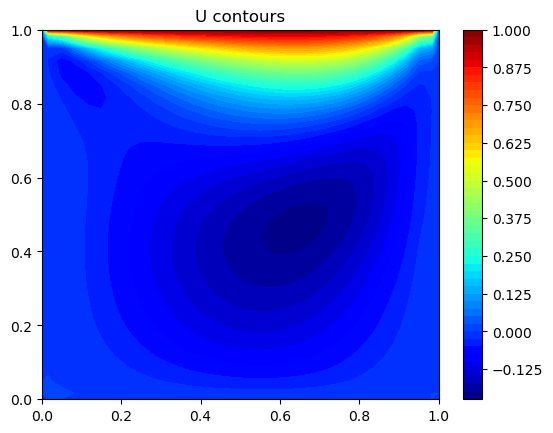

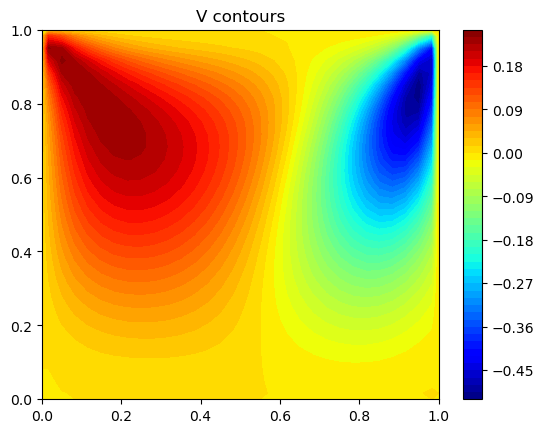

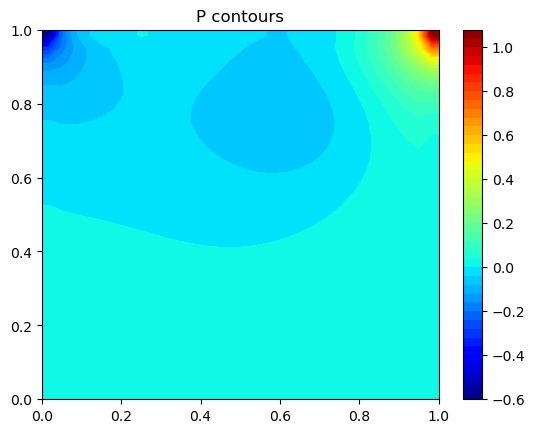

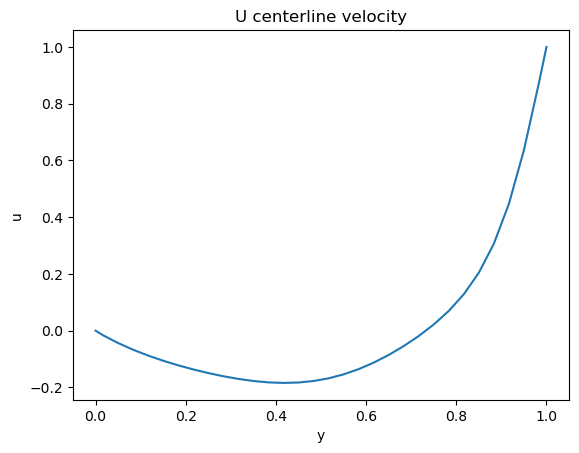

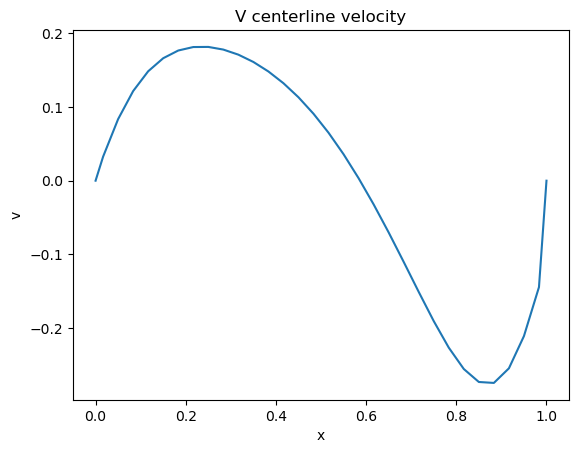

In [13]:

post_processing(u_star,v_star,p_star,X,Y,x,y)